In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [5]:
#第二步：分离训练数据的特征向量和标记(不同于上一讲的kmeans,没有操作测试数据)
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]
# 这个64是把图片分成8*8的矩阵

In [6]:
from sklearn.decomposition import PCA
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)
# 把64维的向量压缩到两个维度的PCA

d:\ai\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
d:\ai\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


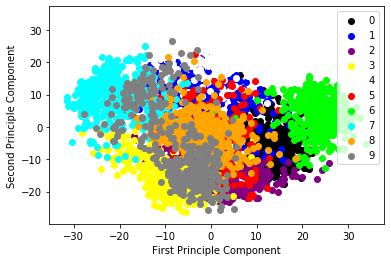

In [12]:
# 显示0到9数字经过压缩后的特征分布
def plot_pca_scatter():
    colors=['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
    for i in range(len(colors)):
        px = X_pca[:,0][y_digits.as_matrix()==i]
        py = X_pca[:,1][y_digits.as_matrix()==i]
        plt.scatter(px,py,c=colors[i])
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.show()
# 压缩成二维向量之后，方便肉眼可视化
plot_pca_scatter()

In [13]:
# 现在来用原始和压缩后的对比来看看效果
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]
#导入默认配置初始化LinearSVC,对原始64维像素特征的训练数据进行建模，并在数据上做出预测，存储在y_predict
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)

d:\ai\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
#使用PCA将原64维数据->20维
estimator = PCA(n_components=20)
#利用训练特征决定(fit)20个正交维度的方向，并转化(transform)原训练特征
pca_X_train = estimator.fit_transform(X_train)
pca_X_test = estimator.transform(X_test)
#同样使用默认配置下的LinearSVC,对新的20维像素特征的训练数据进行建模，并在数据上做出预测，存储在pca_y_predict
pca_svc = LinearSVC()
pca_svc.fit(pca_X_train,y_train)
pca_y_predict = pca_svc.predict(pca_X_test)

d:\ai\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [16]:
#第五步：比较两种不同维度的特征在同一个模型下的性能差异
from sklearn.metrics import classification_report
print('the accuracy of origin data is:',svc.score(X_test,y_test))
print(classification_report(y_test,y_predict,target_names=np.arange(10).astype(str)))
print('the accuracy of transformed data is:',pca_svc.score(pca_X_test,y_test))
print(classification_report(y_test,pca_y_predict,target_names=np.arange(10).astype(str)))

#总结：
#1.尽管经过PCA特征压缩和重建之后的特征数据损失了2%左右的精确性，但是降低了68.75%的维度；
#2.降维/压缩问题是选取数据具有代表性的特征，在保持数据多样性的基础上，规避了大量的特征冗余和噪声；
#3.损失了一部分的精确性，但是大量提升了用于模型训练的时间，效率更高。

the accuracy of origin data is: 0.9371174179187535
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.85      0.96      0.90       182
           2       0.99      0.97      0.98       177
           3       0.99      0.91      0.95       183
           4       0.95      0.96      0.95       181
           5       0.91      0.96      0.93       182
           6       0.99      0.98      0.99       181
           7       0.98      0.91      0.94       179
           8       0.95      0.81      0.88       174
           9       0.82      0.93      0.87       180

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

the accuracy of transformed data is: 0.9232053422370617
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.88  